In [2]:
import pandas as pd

df=pd.read_excel(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\updated_filtered_data_with_lengths.xlsx')

print(len(df))
df=df.dropna()
print(len(df))
df

192
148


,Unnamed: 0,Label,PrawnID,Avg_Length,Std_Length,Uncertainty,Length_1,Length_2,Length_3,BoundingBox_1,...,id,Length_fov(mm),Height(mm),focal_RealLength(cm),Length_1_pixels,Length_2_pixels,Length_3_pixels,Pond_Type,Euclidean_Distance,pose_eval_iou
0,8,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_0,41.918000,2.531547,1.461589,40.475,39.802,45.477,"(2996.016573, 737.0050179, 159.9996606, 166.00...",...,66f57dee6e41de5c74ce9c99,37.355216,650.0,39.424257,229.141118,226.556964,263.179947,test-right,200.019794,0.931093
1,9,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_1,26.698000,1.842735,1.063904,28.855,24.353,26.886,"(3770.0181864, 1859.0067423, 114.9979869, 117....",...,66f57dee6e41de5c74ce9c9f,26.800723,650.0,28.310057,163.356811,138.619711,155.591971,test-right,143.631668,0.891552
2,10,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_2,46.299667,4.579569,2.644015,51.637,40.454,46.808,"(1136.0077806, 2072.0074935, 280.9986255, 84.9...",...,66f57dee6e41de5c74ce9c9b,42.863067,650.0,44.895700,292.332548,230.268213,270.882577,test-right,227.779274,0.984503
3,11,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_3,24.278667,0.552181,0.318802,24.729,24.606,23.501,"(368.0014839, 2140.0110291, 141.0003378, 1.002...",...,66f57dee6e41de5c74ce9c9d,22.394728,650.0,23.428450,139.998288,140.059813,136.002637,test-right,118.864734,0.870366
4,20,carapace:undistorted_GX010068_26_666.jpg_gamma,Prawn_0,33.843333,2.607538,1.505463,36.364,30.252,34.914,"(1496.0102131, 2248.0127922, 149.0029833, 149....",...,66f57def6e41de5c74ce9cba,29.477403,650.0,31.111211,209.307548,152.736298,189.694745,test-right,157.843383,0.945416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1077,carapace:undistorted_GX010183_37_685.jpg_gamma,Prawn_2,39.201000,2.805890,1.619981,38.939,35.903,42.761,"(1039.9968915, 2155.9928691, 181.0022403, 212....",...,66f57df36e41de5c74cea240,20.478708,455.0,20.657066,278.106232,261.600029,305.523069,test-car,156.560090,0.858191
188,1086,carapace:undistorted_GX010183_80_1633.jpg_gamma,Prawn_0,39.565333,2.045577,1.181015,41.730,36.821,40.145,"(364.0008550000001, 1448.0027236, 60.9995292, ...",...,66f57df36e41de5c74cea255,30.303052,455.0,30.317194,321.646494,296.861948,316.306469,test-car,229.774280,0.891947
189,1087,carapace:undistorted_GX010183_80_1633.jpg_gamma,Prawn_1,35.726667,2.216436,1.279660,34.318,34.006,38.856,"(2732.0065866, 1332.0003336, 249.000479, 93.00...",...,66f57df36e41de5c74cea255,30.303052,455.0,30.317194,264.516280,274.166574,306.150310,test-car,229.774280,0.891947
190,1096,carapace:undistorted_GX010183_128_2852.jpg_gamma,Prawn_0,32.746333,1.552567,0.896375,34.761,30.983,32.495,"(3943.98895, 1279.9998518, 236.9997988, 124.99...",...,66f57df36e41de5c74cea22d,23.277313,455.0,23.280273,266.596013,250.714436,234.776375,test-car,176.441397,0.801743


mean difference between min max 6.022547297297297
std  difference between min max  3.4118945369224236


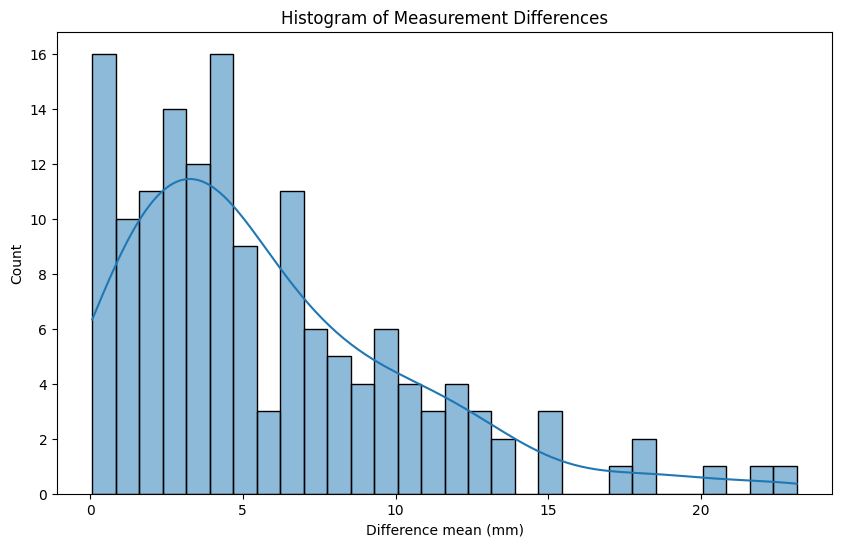

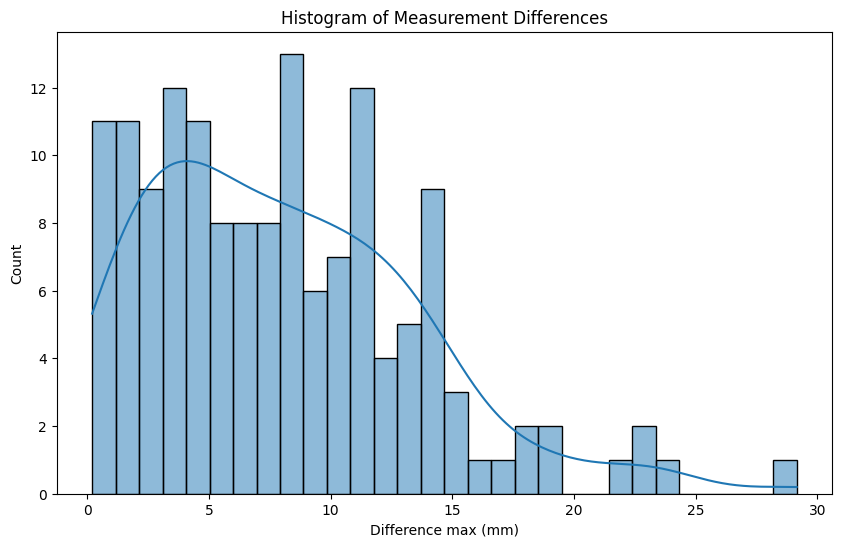

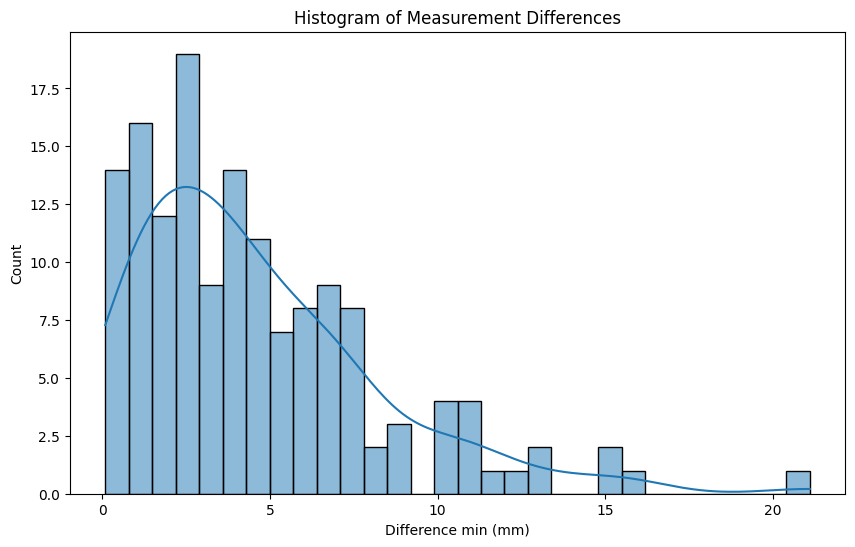

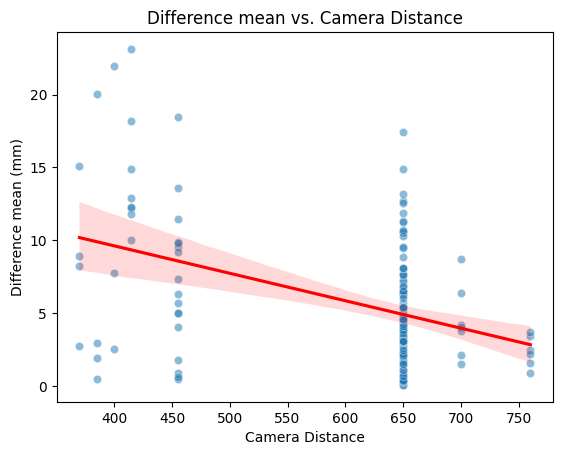

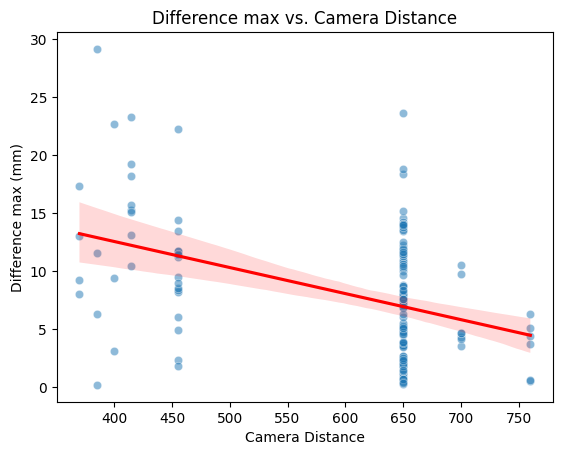

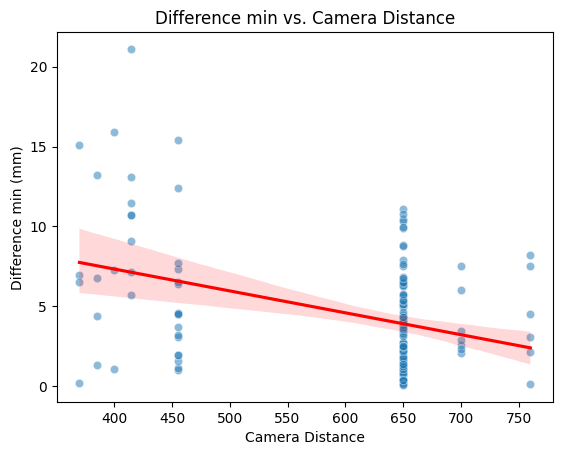

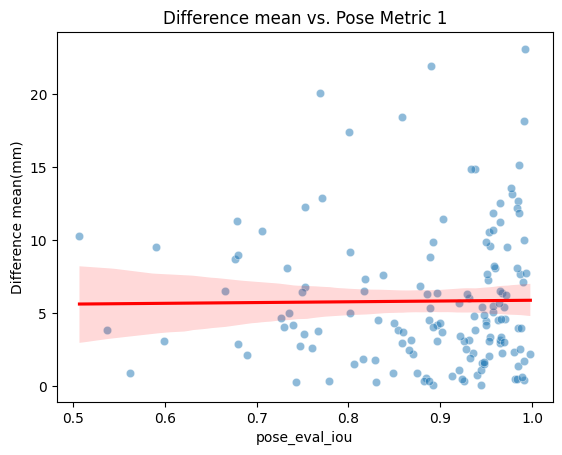

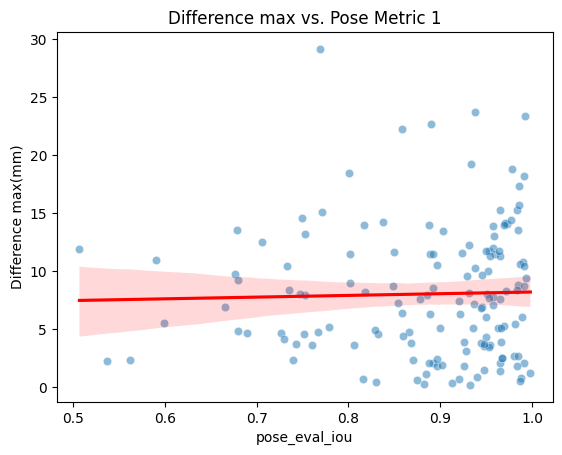

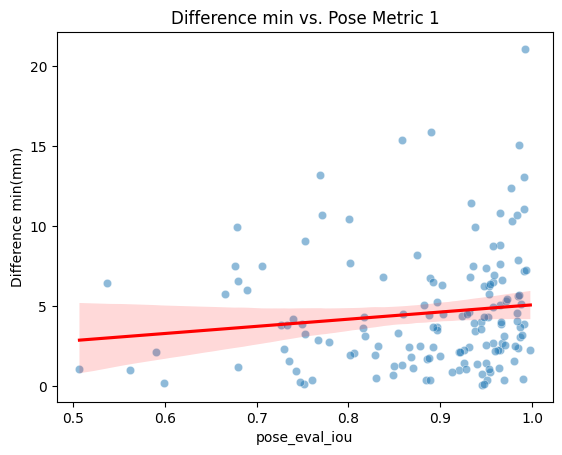

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, levene
# import pingouin as pg
import statsmodels.api as sm
import numpy as np

# Load your data

# Calculate expert averages and standard deviations
df['expert_mean'] = df[['Length_1', 'Length_2', 'Length_3']].median(axis=1)
df['expert_std'] = df[['Length_1', 'Length_2', 'Length_3']].std(axis=1)

df['expert_max'] = df[['Length_1', 'Length_2', 'Length_3']].max(axis=1)
df['expert_min'] = df[['Length_1', 'Length_2', 'Length_3']].min(axis=1)

#diffrence in pixels between the min and max of Length_1_pixels, Length_2_pixels, Length_3_pixels

df['diff_max_min'] =abs(df[['Length_1', 'Length_2', 'Length_3']].max(axis=1) - df[['Length_1', 'Length_2', 'Length_3']].min(axis=1))

print(f'mean difference between min max' ,df['diff_max_min'].mean())
print(f'std  difference between min max ',df['diff_max_min'].std())


#violoin plot of the difference between the min and max of the three measurements
fig = px.violin(df,
                x='Pond_Type', 
                y='diff_max_min', 
                box=True,  # Include box plot
                points="all",  # Show all points
                hover_data=['Label', 'PrawnID'],  # Include hover data
                title=f'Violin plot of diff_max_min',)
#Save the plot to png
fig.write_image(f'violin carapace diff_max_min.png')
fig.show()






# Calculate differences
df['diff_mean'] =abs(df['Length_fov(mm)'] - df['expert_mean'])
df['diff_max'] =abs(df['Length_fov(mm)'] - df['expert_max'])
df['diff_min'] =abs(df['Length_fov(mm)'] - df['expert_min'])

#scatter betwenn diff_max_min and diff_max
sns.scatterplot(x='diff_max_min', y='diff_max', data=df, alpha=0.5)
sns.regplot(x='diff_max_min', y='diff_max', data=df, scatter=False, color='red')
plt.xlabel('diff_max_min')
plt.ylabel('diff_max')
plt.title('diff_max vs. diff_max_min')
plt.show()


#find the minimun error of the three measurements
df['the_min_diff'] = df[['diff_mean', 'diff_max', 'diff_min']].min(axis=1)

#find the maximum error of the three measurements
df['the_max_diff'] = df[['diff_mean', 'diff_max', 'diff_min']].max(axis=1)


#the length measurement of the the_min_diff
df['the_min_diff_length'] =abs(df['Length_fov(mm)'] - df['the_min_diff'])

#the length measurement of the the_max_diff
df['the_max_diff_length'] =abs(df['Length_fov(mm)'] - df['the_max_diff'])


#percent error of the the_min_diff
df['the_min_diff_percenage_error'] = (df['the_min_diff'] / df['the_min_diff_length']) * 100
#MAE of the the_min_diff

#percent error of the the_max_diff
df['the_max_diff_percenage_error'] = (df['the_max_diff'] / df['the_max_diff_length']) * 100



# Create a violin plot using plotly
import plotly.express as px
#violin plots wiht plotly for mean percentage error and MAE
for error in ['the_min_diff_percenage_error', 'the_min_diff', 'the_max_diff_percenage_error', 'the_max_diff']:
        # Create a violin plot using plotly 
    fig = px.violin(df,
                    x='Pond_Type', 
                    y=error, 
                    box=True,  # Include box plot
                    points="all",  # Show all points
                    hover_data=['Label', 'PrawnID'],  # Include hover data
                    title=f'Violin plot of {error}',)
    #Save the plot to png
    fig.write_image(f'violin carapace {error}_.png')
    fig.show()





# Inter-Expert Reliability


# Bland-Altman Plot


# Regression Analysis


# # Visualization: Scatter Plot with Regression
# sns.lmplot(x='expert_mean', y='Length_fov(mm)', data=df, aspect=1.5, scatter_kws={'alpha':0.5})
# plt.xlabel('Expert Mean Measurement (mm)')
# plt.ylabel('Keypoint Detection Measurement (mm)')
# plt.title('Keypoint vs. Expert Measurements')
# plt.show()

# Additional plots as needed
# Example: Histogram of Differences
plt.figure(figsize=(10, 6))
sns.histplot(df['diff_mean'], bins=30, kde=True)
plt.xlabel('Difference mean (mm)')
plt.title('Histogram of Measurement Differences')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['diff_max'], bins=30, kde=True)
plt.xlabel('Difference max (mm)')
plt.title('Histogram of Measurement Differences')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['diff_min'], bins=30, kde=True)
plt.xlabel('Difference min (mm)')
plt.title('Histogram of Measurement Differences')
plt.show()


# Example: Effect of Camera Distance
sns.scatterplot(x='Height(mm)', y='diff_mean', data=df, alpha=0.5)
sns.regplot(x='Height(mm)', y='diff_mean', data=df, scatter=False, color='red')
plt.xlabel('Camera Distance')
plt.ylabel('Difference mean (mm)')
plt.title('Difference mean vs. Camera Distance')
plt.show()

sns.scatterplot(x='Height(mm)', y='diff_max', data=df, alpha=0.5)
sns.regplot(x='Height(mm)', y='diff_max', data=df, scatter=False, color='red')
plt.xlabel('Camera Distance')
plt.ylabel('Difference max (mm)')
plt.title('Difference max vs. Camera Distance')
plt.show()

sns.scatterplot(x='Height(mm)', y='diff_min', data=df, alpha=0.5)
sns.regplot(x='Height(mm)', y='diff_min', data=df, scatter=False, color='red')
plt.xlabel('Camera Distance')
plt.ylabel('Difference min (mm)')
plt.title('Difference min vs. Camera Distance')
plt.show()


# Example: Pose Metric 1 vs. Difference
sns.scatterplot(x='pose_eval_iou', y='diff_mean', data=df, alpha=0.5)
sns.regplot(x='pose_eval_iou', y='diff_mean', data=df, scatter=False, color='red')
plt.xlabel('pose_eval_iou')
plt.ylabel('Difference mean(mm)')
plt.title('Difference mean vs. Pose Metric 1')
plt.show()

sns.scatterplot(x='pose_eval_iou', y='diff_max', data=df, alpha=0.5)
sns.regplot(x='pose_eval_iou', y='diff_max', data=df, scatter=False, color='red')
plt.xlabel('pose_eval_iou')
plt.ylabel('Difference max(mm)')
plt.title('Difference max vs. Pose Metric 1')
plt.show()

sns.scatterplot(x='pose_eval_iou', y='diff_min', data=df, alpha=0.5)
sns.regplot(x='pose_eval_iou', y='diff_min', data=df, scatter=False, color='red')
plt.xlabel('pose_eval_iou')
plt.ylabel('Difference min(mm)')
plt.title('Difference min vs. Pose Metric 1')
plt.show()





df['mean_percenage_error_mean'] = (df['diff'] / df['expert_mean']) * 100
df['MAE_mean'] = df['diff']

df['max_percenage_error_max'] = (df['diff_max'] / df['expert_max']) * 100
df['MAE_max'] = df['diff_max']

df['min_percenage_error_min'] = (df['diff_min'] / df['expert_min']) * 100
df['MAE_min'] = df['diff_min']



# Create a violin plot using plotly
import plotly.express as px
#violin plots wiht plotly for mean percentage error and MAE
for error in ['mean_percenage_error_mean', 'MAE_mean', 'max_percenage_error_max', 'MAE_max', 'min_percenage_error_min', 'MAE_min']:

        # Create a violin plot using plotly 
    fig = px.violin(df,
                    x='Pond_Type', 
                    y=error, 
                    box=True,  # Include box plot
                    points="all",  # Show all points
                    hover_data=['Label', 'PrawnID'],  # Include hover data
                    title=f'Violin plot of {error}',)
    #Save the plot to png
    fig.write_image(f'violin carapace {error}_.png')
    fig.show()




# Normality Test


In [ ]:
X = df[['camera_distance', 'pose_metric_1', 'pose_metric_2']]  # Add other pose metrics if available
X = sm.add_constant(X)
y = df['diff']
model = sm.OLS(y, X).fit()
print(model.summary())




melted_df = df.melt(id_vars=['Label','PrawnID'], value_vars=['Length_1', 'Length_2', 'Length_3'],
                   var_name='rater', value_name='measurement')
icc = pg.intraclass_corr(data=melted_df, targets=['Label','PrawnID'], raters='rater', ratings='measurement')
print(icc)


# Correlation Analysis
pearson_corr, pearson_p = pearsonr(df['keypoint_mm'], df['expert_mean'])
spearman_corr, spearman_p = spearmanr(df['keypoint_mm'], df['expert_mean'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")

mean_measurements = (df['keypoint_mm'] + df['expert_mean']) / 2
diff_measurements = df['diff']
md = np.mean(diff_measurements)
sd = np.std(diff_measurements)

plt.figure(figsize=(10, 6))
plt.scatter(mean_measurements, diff_measurements, alpha=0.5)
plt.axhline(md, color='gray', linestyle='--', label=f'Mean Diff = {md:.2f} mm')
plt.axhline(md + 1.96*sd, color='red', linestyle='--', label=f'+1.96 SD = {md + 1.96*sd:.2f} mm')
plt.axhline(md - 1.96*sd, color='red', linestyle='--', label=f'-1.96 SD = {md - 1.96*sd:.2f} mm')
plt.xlabel('Mean of Measurements (mm)')
plt.ylabel('Difference (Keypoint - Expert) (mm)')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()



stat, p = shapiro(df['diff'])
print(f'Shapiro-Wilk Test: stat={stat:.3f}, p-value={p:.3e}')

# Homogeneity of Variance
# Assuming 'camera_distance_category' is already defined as in the visualization section
groups = df.groupby('camera_distance_category')['diff'].apply(list)
stat, p = levene(*groups)
print(f"Levene’s Test: stat={stat:.3f}, p-value={p:.3e}")
